# Week 8 Homework
> Benzon Carlitos Salazar

For this problem you will use an image segmentation data set for clustering. You will experiment with using PCA as an approach to reduce dimensionality and noise in the data. You will compare the results of clustering the data with and without PCA using the provided image class assignments as the ground truth. The data set is divided into three files:
1. The file "segmentation_data.txt" contains data about images with each line corresponding to one image.
2. Each image is represented by 19 features (these are the columns in the data and correspond to the feature names in the file "segmentation_names.txt".
3. The file "segmentation_classes.txt" contains the class labels (the type of image) and a numeric class label for each of the corresponding images in the data file.

After clustering the image data, you will use the class labels to measure completeness and homogeneity of the generated clusters. The data set used in this problem is based on the Image Segmentation data set at the UCI Machine Learning Repository.

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import completeness_score, homogeneity_score, confusion_matrix
import matplotlib.pyplot as plt

## Step 1.

Load in the image data matrix (with rows as images and columns as features). Also load in the numeric class labels from the segmentation class file. Using your favorite method (e.g., sklearn's min-max scaler), perform min-max normalization on the data matrix so that each feature is scaled to [0,1] range.

In [2]:
data = pd.read_csv("./data/segmentation_data.txt", header=None, delimiter=',')
classes = pd.read_csv("./data/segmentation_classes.txt", header=None, delimiter=',', names=['Class'])

scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(data)

In [3]:
label_encoder = LabelEncoder()
classes['Class'] = label_encoder.fit_transform(classes['Class'])

scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(data)

## Step 2.

Using the Kmeans implementation in scikit-learn, perform clustering on the image data (use K = 7 in your clustering so that later we can compare the clusters to the 7 pre-assigned image classes). Print the cluster centroids (use some formatting so that they are visually understandable). Add these to your submission document. Compare your 7 clusters to the 7 pre-assigned classes by computing the Completeness and Homogeneity values of the generated clusters as well as the misclassification rate using confusion matrices.Add the comparison values to your submission document.

In [4]:
k = 7
n_initial_value = 10

kmeans = KMeans(n_clusters=k, n_init=n_initial_value, random_state=42)
cluster_labels = kmeans.fit_predict(normalized_data)

#### Print cluster centroids

In [5]:
print("Cluster Centroids:")
print(pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=data.columns))

Cluster Centroids:
           0           1    2         3         4         5          6   \
0   77.533898  138.406780  9.0  0.017420  0.010358  2.946092   9.342202   
1  195.277419  113.251613  9.0  0.004659  0.005018  1.157885   2.948459   
2  136.380000   47.040000  9.0  0.009259  0.000370  0.883333   0.538392   
3  131.040404  205.144781  9.0  0.025814  0.001122  1.591844   1.395540   
4   64.674627  105.259701  9.0  0.025207  0.004312  2.269320   4.115067   
5  190.313253  138.689759  9.0  0.013052  0.008367  3.317604  18.765677   
6   65.027586  121.365517  9.0  0.008812  0.003065  1.093295   2.358279   

         7          8           9           10          11          12  \
0  3.755414  15.309615   57.465003   50.778719   71.289078   50.327213   
1  1.032079   2.894470    5.794982    4.731183    8.654122    3.999642   
2  1.197037   0.813307  118.090124  106.907778  134.920373  112.442223   
3  2.072203   1.942208   15.605312   12.532361   13.944258   20.339319   
4  2.73880

#### Evaluate clustering performance

In [6]:
completeness = completeness_score(classes['Class'], cluster_labels)
homogeneity = homogeneity_score(classes['Class'], cluster_labels)
conf_matrix = confusion_matrix(classes['Class'], cluster_labels)

misclassification_rate = np.sum(conf_matrix) - np.sum(np.diag(conf_matrix))
misclassification_rate /= np.sum(conf_matrix)

In [7]:
print("\nCompleteness:", completeness)
print("Homogeneity:", homogeneity)
print("Misclassification Rate:", misclassification_rate)
print("Confusion Matrix:")
print(conf_matrix)


Completeness: 0.6117374684331666
Homogeneity: 0.6100499914689615
Misclassification Rate: 0.8185714285714286
Confusion Matrix:
[[  0  69   0   0 170   0  61]
 [113   7   0   0  42 137   1]
 [  8  47   0   0  54  12 179]
 [  0   0   0 297   2   1   0]
 [115   0   0   0  27 158   0]
 [  0   0 300   0   0   0   0]
 [  0 186   0   0  40  24  50]]


## Step 3.

Perform PCA on the normalized image data matrix. You can use the code done in class. Analyze the principal components to determine the number, r, of PCs needed to capture at least 95% of variance in the data. Provide a plot of PC variances (for different values of r). Then use these r components as features to transform the data into a reduced dimension space.

In [8]:
pca = PCA()
pca.fit(normalized_data)
explained_variance = pca.explained_variance_ratio_

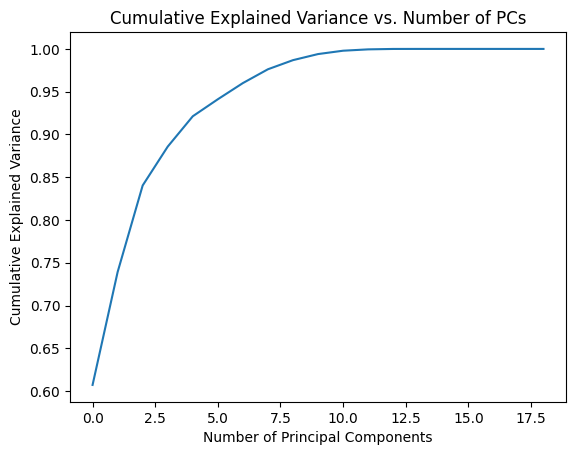

In [9]:
plt.plot(np.cumsum(explained_variance))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of PCs')

plt.savefig("./pca_clustering.png")
plt.show()

#### Determine the number of components to capture at least 95% of variance

In [10]:
cumulative_variance = np.cumsum(explained_variance)
num_components = np.argmax(cumulative_variance >= 0.95) + 1

print(f"Number of Principal Components to capture at least 95% variance: {num_components}")

Number of Principal Components to capture at least 95% variance: 7


#### Perform PCA with the determined number of components

In [11]:
pca = PCA(n_components=num_components)
transformed_data = pca.fit_transform(normalized_data)

## Step 4.

Perform Kmeans again, but this time on the lower dimensional transformed data. Then compare completeness and Homogeneity values of the new clusters as well as the misclassification rate using confusion matrices. Compare these results with those obtained on the full data in part b. Put these values in your submission document.

In [12]:
kmeans_pca = KMeans(n_clusters=k, n_init=n_initial_value, random_state=42)
cluster_labels_pca = kmeans_pca.fit_predict(transformed_data)

#### Evaluate clustering performance on PCA data

In [13]:
completeness_pca = completeness_score(classes['Class'], cluster_labels_pca)
homogeneity_pca = homogeneity_score(classes['Class'], cluster_labels_pca)
conf_matrix_pca = confusion_matrix(classes['Class'], cluster_labels_pca)

misclassification_rate_pca = np.sum(conf_matrix_pca) - np.sum(np.diag(conf_matrix_pca))
misclassification_rate_pca /= np.sum(conf_matrix_pca)

In [14]:
print("\nCompleteness (PCA):", completeness_pca)
print("Homogeneity (PCA):", homogeneity_pca)
print("Misclassification Rate (PCA):", misclassification_rate_pca)
print("Confusion Matrix (PCA):")
print(conf_matrix_pca)


Completeness (PCA): 0.6110721173142057
Homogeneity (PCA): 0.6094646259197862
Misclassification Rate (PCA): 0.8523809523809524
Confusion Matrix (PCA):
[[170   0   0   0  60  70   0]
 [ 42 115   0   0   1   7 135]
 [ 55   8   0   0 178  48  11]
 [  2   0 297   0   0   0   1]
 [ 28 116   0   0   0   0 156]
 [  0   0   0 300   0   0   0]
 [ 41   0   0   0  48 186  25]]


# Key Takeaways

### Misclassification Rate Without PCA (0.8186): 

- This represents the proportion of misclassified samples in the clustering results when using the original high-dimensional data. A lower misclassification rate is generally desirable, indicating better separation of clusters.

### Misclassification Rate With PCA (0.8524):

- This represents the proportion of misclassified samples after applying PCA for dimensionality reduction. A slightly higher misclassification rate might indicate that the reduced-dimensional representation didn't capture all the information needed for optimal clustering.

Essentially, it boils down to two things:
1. If the misclassification rate with PCA is significantly lower, it would suggest that PCA helped improve the clustering performance by reducing noise and capturing essential information.
2. If the misclassification rate with PCA is comparable or slightly higher, it might indicate that the reduction in dimensionality didn't significantly benefit the clustering task, and the original high-dimensional representation is already suitable for clustering.